In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# HR Analysis Case Study


## Основная информация

В этом наборе данных представлены сведения о работниках некоторой компании. Для каждого сотрудника указано:
- id - его идентификатор
- department - отдел
- region - регион
- education - ступень образования
- gender - пол
- recruitment_channel - канал найма
- no_of_trainings - количество пройденных тренингов
- age -  возраст
- previous_year rating - рейтинг сотрудника за прошлый год
- length_of_service - стаж работы
- KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ? 
- awards_won ? - выигрывал ли награды?
- avg_training_score - средний балл на тренингах 
- is_promoted - был ли повышен в должности?

Задача: построить модель, предсказывающую на основе текущих данных, был ли он повышен в должности.

In [87]:
data = pd.read_csv('train.csv')
data.shape

(54808, 14)

In [88]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [89]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [90]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [92]:
data.index

RangeIndex(start=0, stop=54808, step=1)

#### Характиристики для всех числовых признаков

In [93]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#### Xарактиристики для всех категориальных признаков.

In [118]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Визуализация данных

In [94]:
sns.set(style = 'white', rc={'figure.figsize':(10, 6)}, palette ='deep')

### Поло-возрастной состав компании.

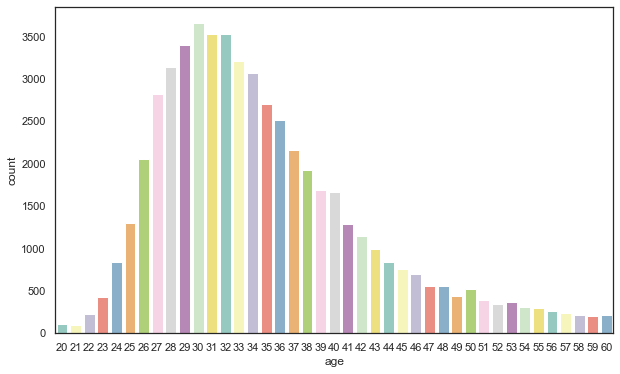

In [95]:
sns.countplot(x='age', data=data, palette="Set3")
pass

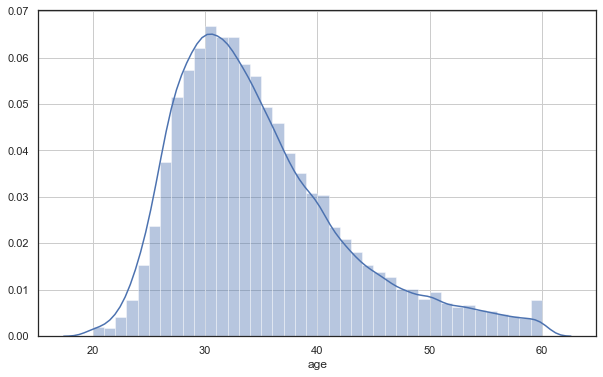

In [96]:
sns.distplot(data['age'], bins=40)
plt.grid()
pass

In [97]:
data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [156]:
 data['gender'].unique().tolist()

['f', 'm']

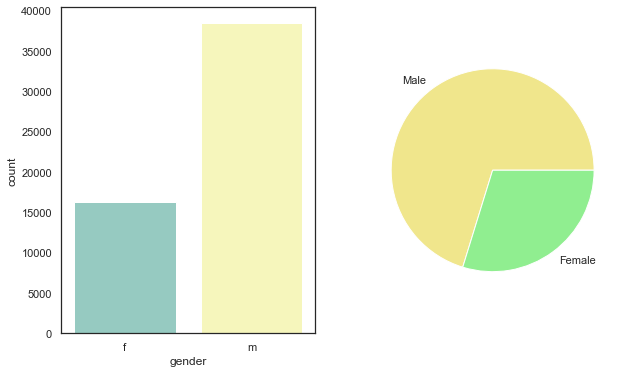

In [163]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='gender', data=data, palette="Set3", ax=ax[0])
plt.pie(data['gender'].value_counts(), labels = ['Male', 'Female'], colors = ['khaki', 'lightgreen'])
pass

Сотрудников-мужчин почти в 2.4 раза больше, чем сотрудников-женщин.

### Уровень образования сотрудников

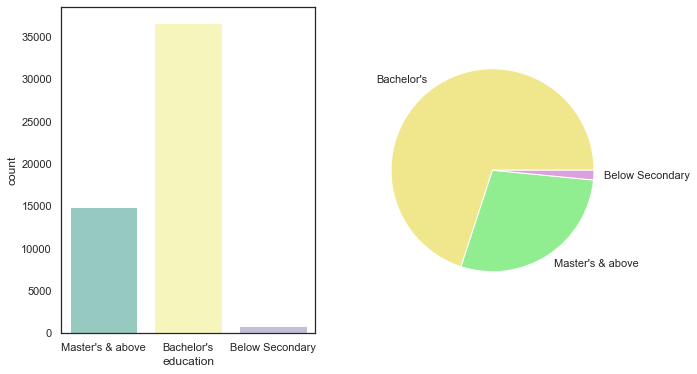

In [175]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='education', data=data, palette="Set3", ax = ax[0])
plt.pie(data['education'].value_counts(), labels = ["Bachelor's", "Master's & above",'Below Secondary'], colors = ['khaki', 'lightgreen', 'plum'])
pass

In [173]:
data['education'].unique().tolist()

["Master's & above", "Bachelor's", nan, 'Below Secondary']

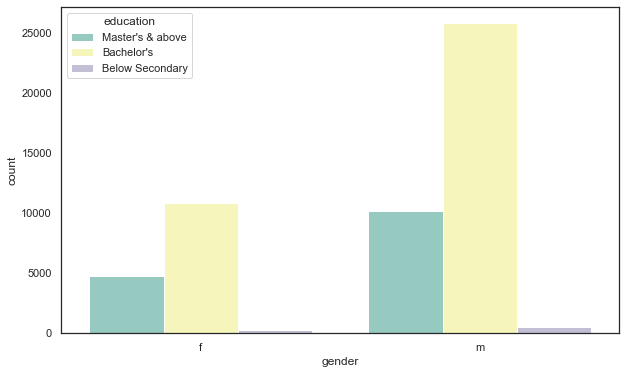

In [100]:
sns.countplot(x='gender', hue = 'education', data=data, palette="Set3")
pass

Для женщин и мужчин распредление уровней образования почти одинаковое (с поправкой на количество тех и других)

Найдем самого часто встрещающегося сотрудника в компании:

In [101]:
data[['department','gender','education', 'age']].mode()

,department,gender,education,age
0,Sales & Marketing,m,Bachelor's,30


### Диаграмма занятости по отраслям

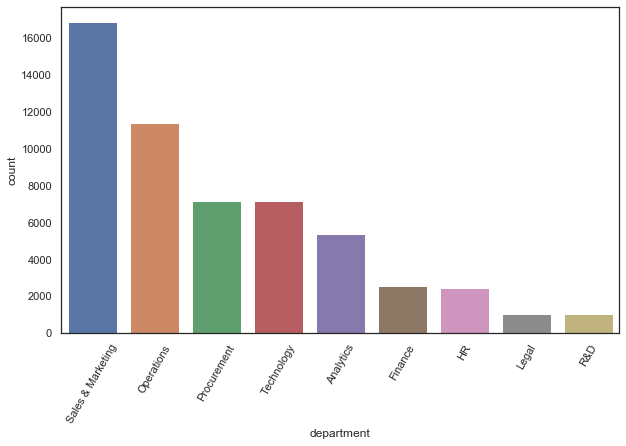

In [132]:
sns.countplot(x='department', order=data['department'].value_counts().index,  data=data)
plt.xticks(rotation = 60)
pass

Наибольшее число сотрудников компании занято в продажах и маркетинге. Следующий за ним по численности отдел - управления операциями (операционный менеджмемнт) - отдел отвечающий за контроль эффективности производства и товаров и услуг. 
Самыми немногочисленными отделами же являются юридический и исследования и разработки. 
Посмотрим на распределение возрастов по каждому отделу

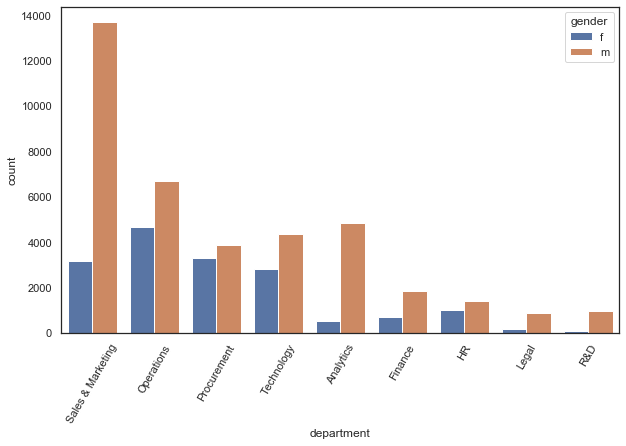

In [133]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='gender',  data=data)
plt.xticks(rotation = 60)
pass

In [134]:
data[data['department'] == 'R&D']['gender'].value_counts()

m    942
f     57
Name: gender, dtype: int64

За счет большего количество мужчин в компании, в каждом отделе преобладают сотрудники мужчины. В отделе закупок и службе HR количество женщин приближается к количеству мужчин. В юридическом и R&D женщины почти отсутствуют.

#### Распределение сотрудников с разным уровнем образования по отраслям

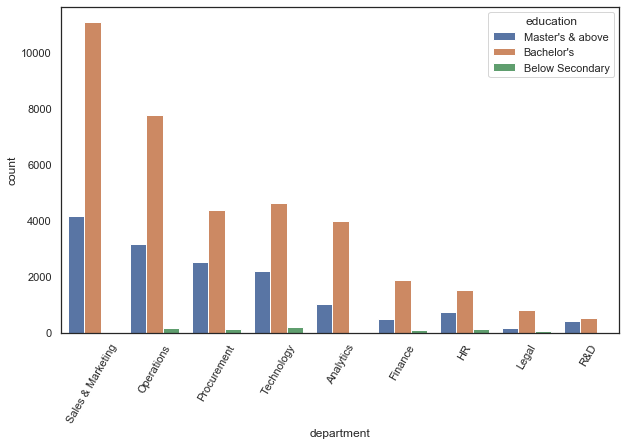

In [135]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='education',  data=data)
plt.xticks(rotation = 60)
pass

#### Распределение возрастов сотрудников по отраслям

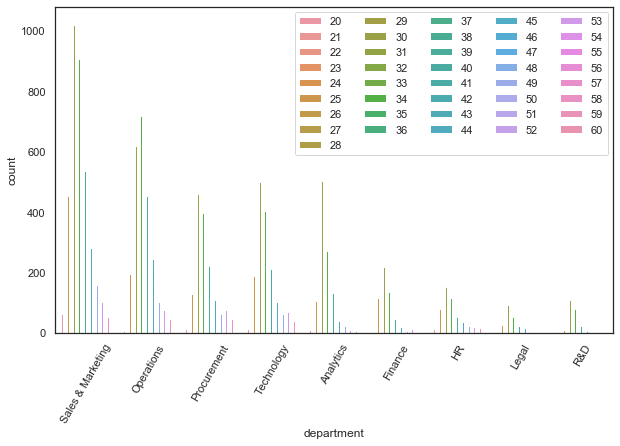

In [136]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue = 'age', data=data)
plt.legend(ncol=5, loc='upper right')
plt.xticks(rotation = 60)
pass

В каждом отделе преобладает число сотрудников среднего возраста. Найдем медианы и моды возрастов по отделам.

In [137]:
data['age'].mean()

34.80391548679025

In [138]:
data[['department', 'age']].mode()

,department,age
0,Sales & Marketing,30


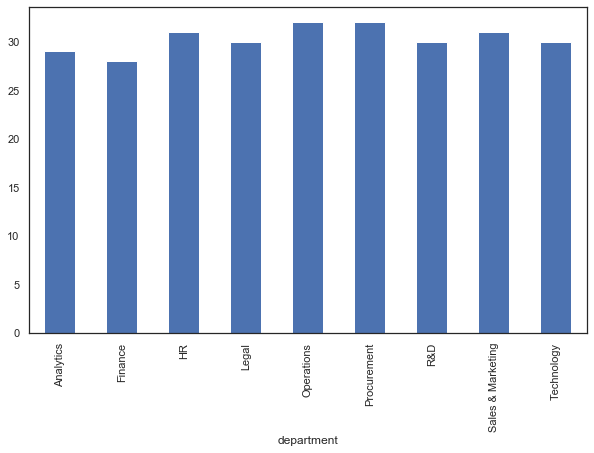

In [139]:
data.groupby('department')['age'].agg(pd.Series.mode).plot.bar()
pass

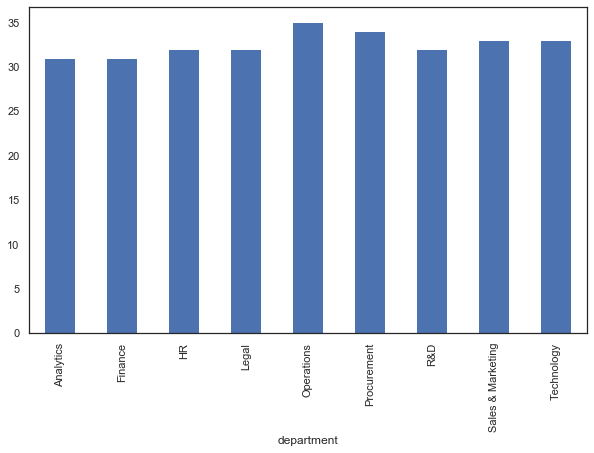

In [140]:
data.groupby('department')['age'].agg(pd.Series.median).plot.bar()
pass

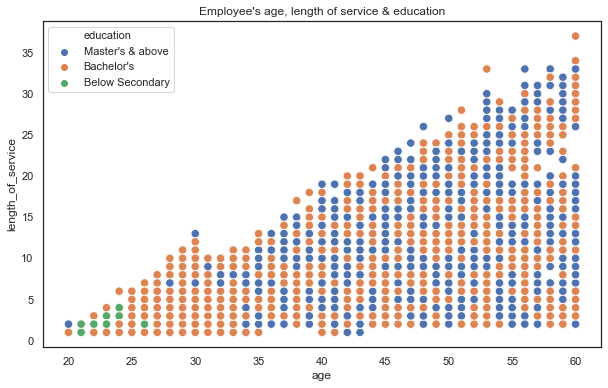

In [111]:
# adding a matplotlib parameters to seaborn functions
sns.scatterplot(data=data, x='age', y='length_of_service',  hue='education', s=70) 
plt.title("Employee's age, length of service & education")
pass

Очевидно, присутствует прямая связь между возрастом и стажом работы в компании.

### Занятость по регионам

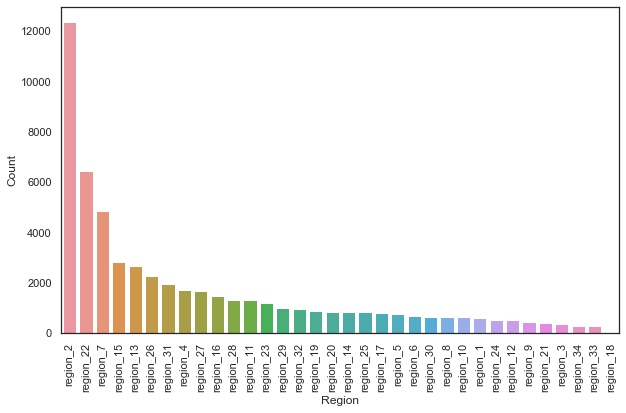

In [141]:
sns.countplot(data['region'], order=data['region'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [128]:
data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

Примерно четверть всех сотрудников компании работают в регионе №2.

### Диаграммы рассеивания для каждой пары переменных

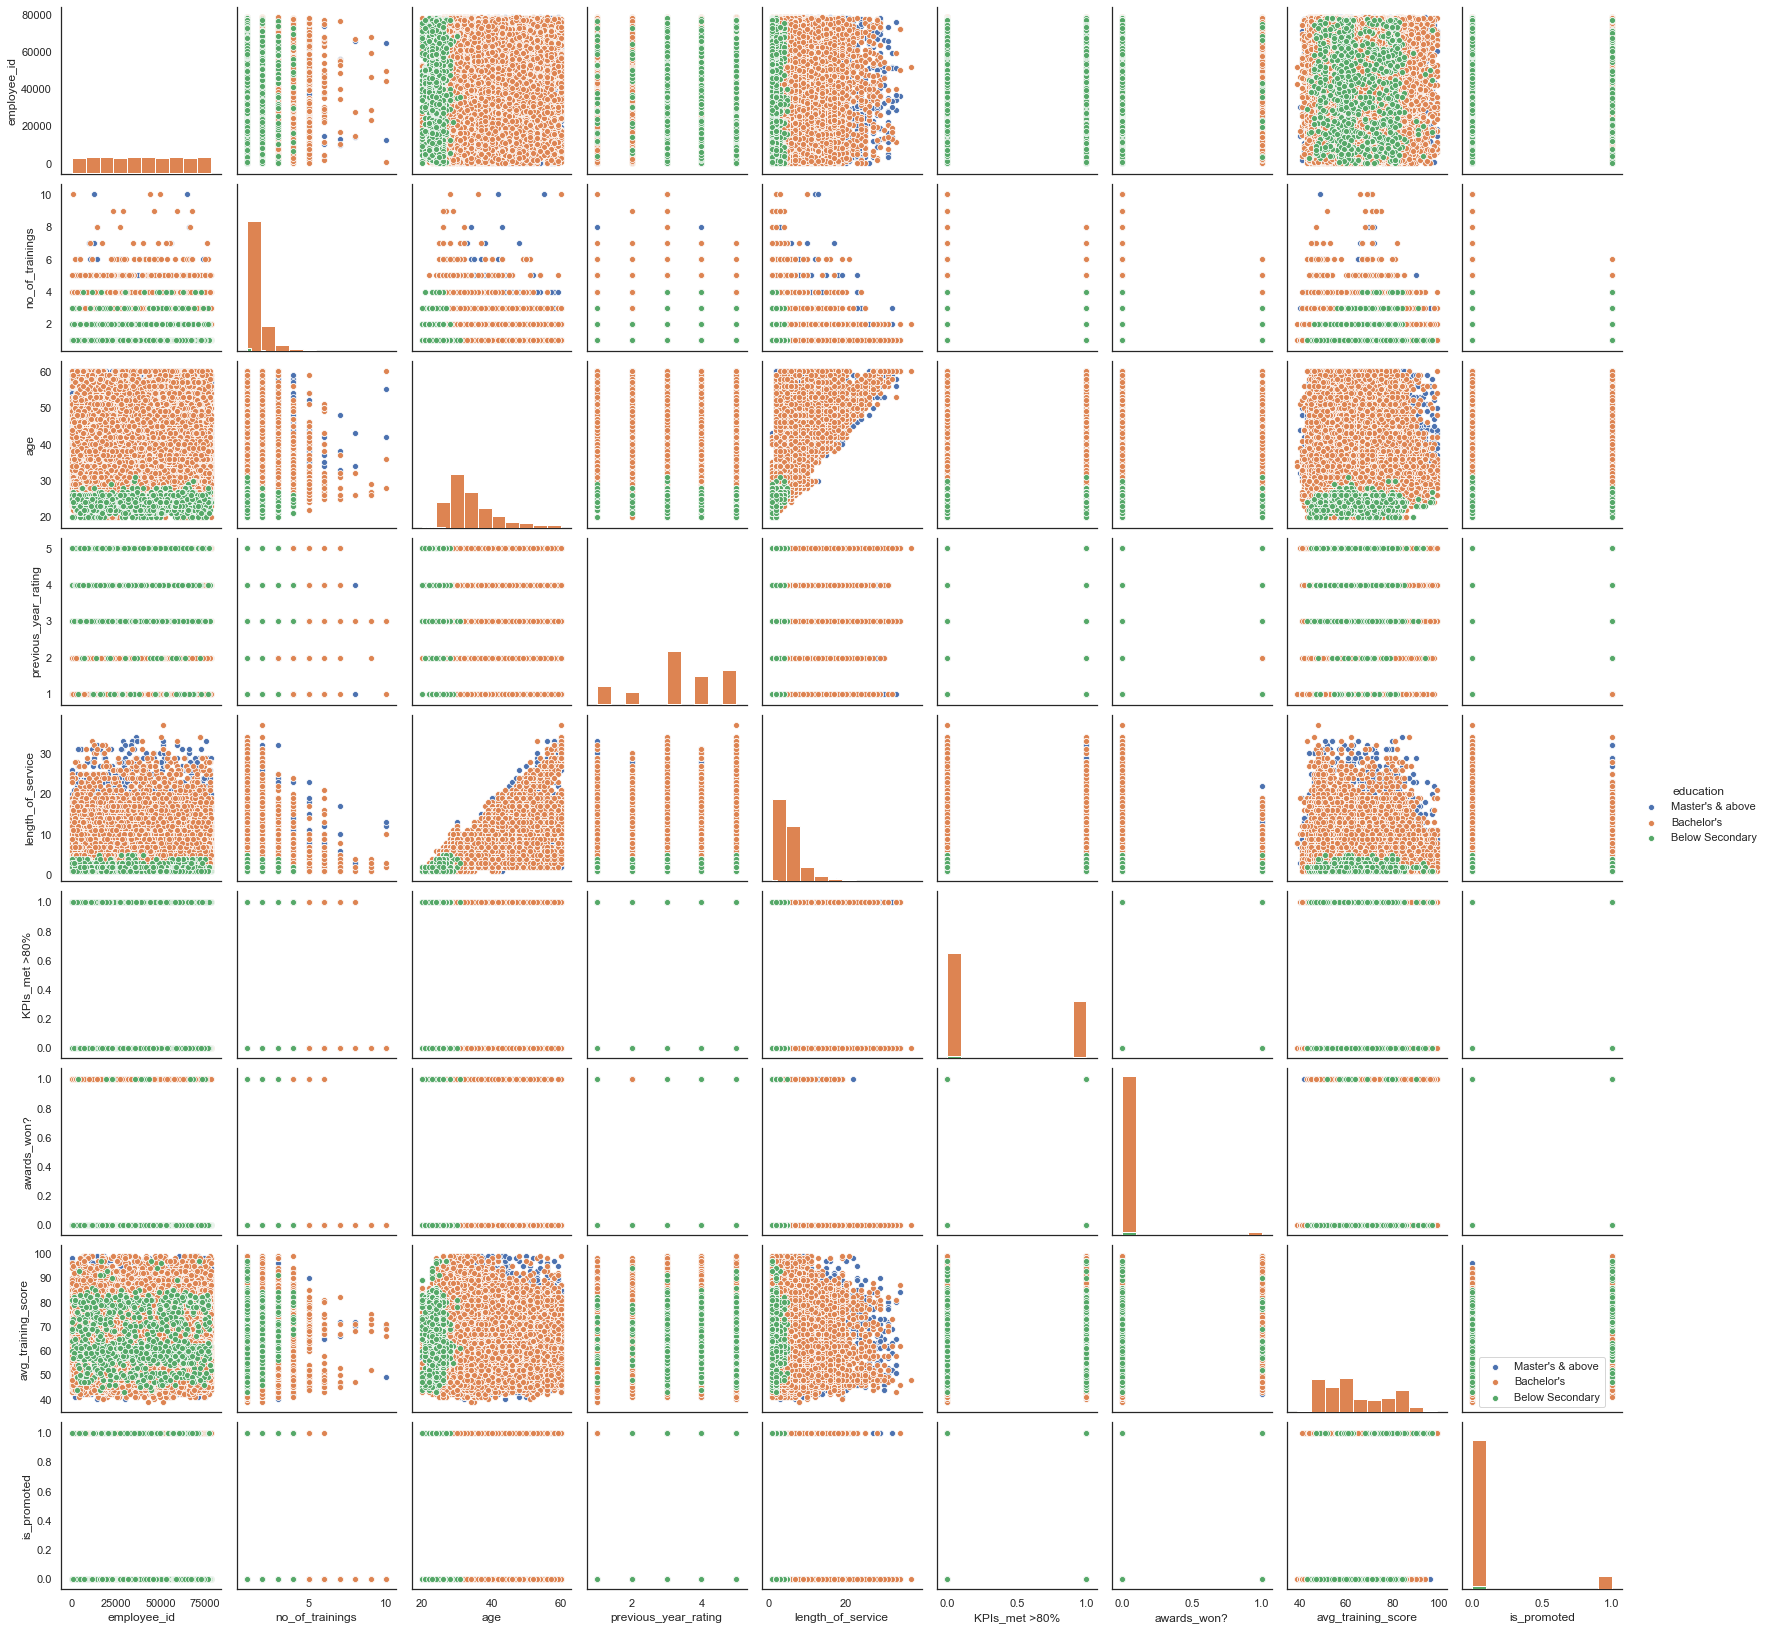

In [113]:
sns.pairplot(data, hue='education', diag_kind='hist')
plt.legend()
pass

#### Графики распределения для каждого числового признака

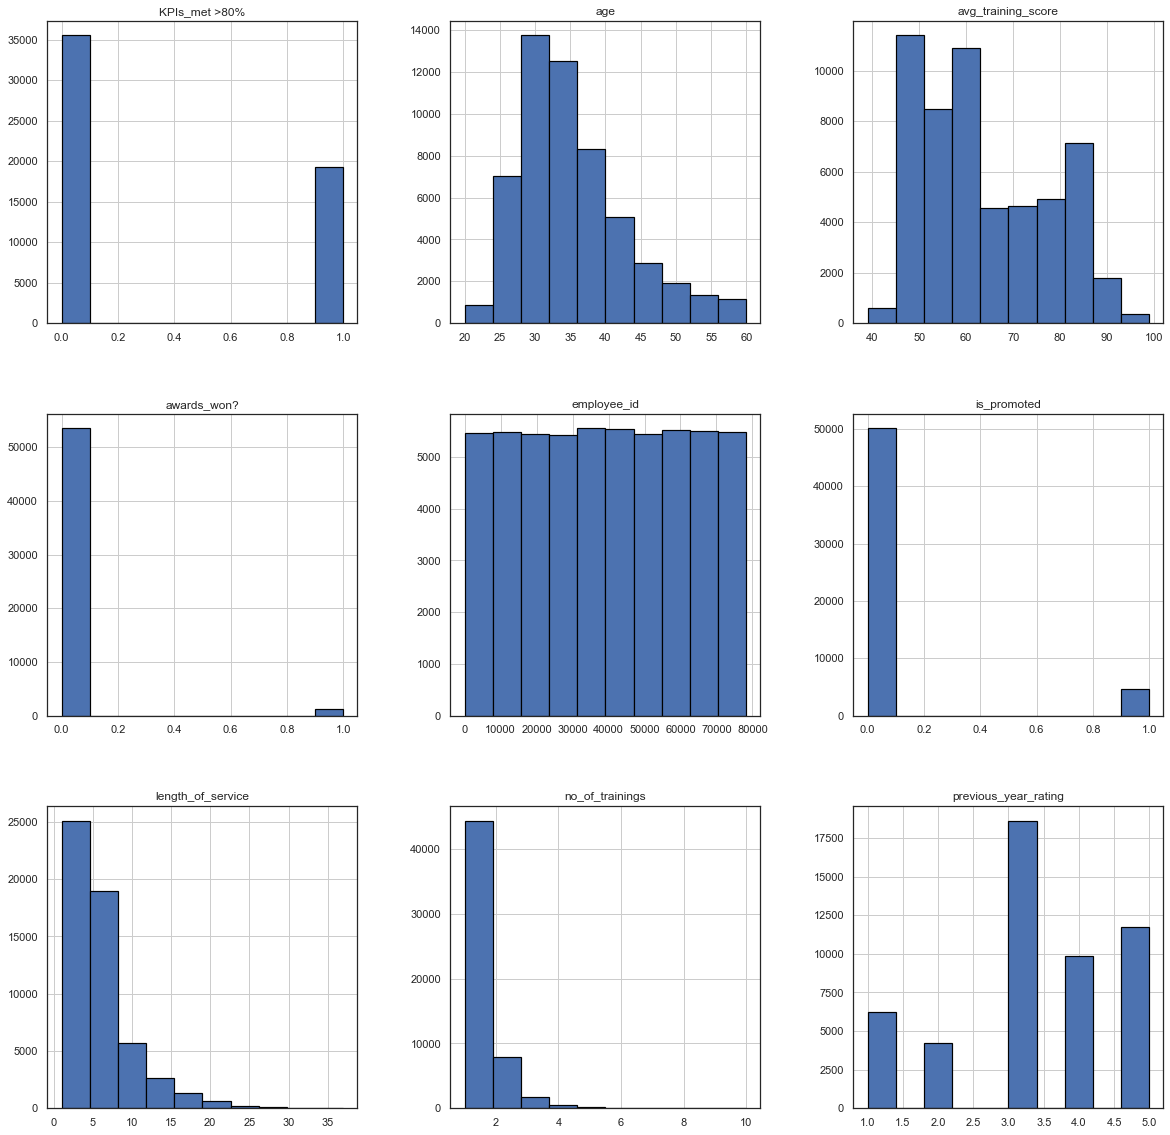

In [114]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

### Корреляционная матрица

In [120]:
corr_mat = data.corr()
corr_mat

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [121]:
corr_mat > 0.5

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,True,False,False,False,False,False,False,False,False
no_of_trainings,False,True,False,False,False,False,False,False,False
age,False,False,True,False,True,False,False,False,False
previous_year_rating,False,False,False,True,False,False,False,False,False
length_of_service,False,False,True,False,True,False,False,False,False
KPIs_met >80%,False,False,False,False,False,True,False,False,False
awards_won?,False,False,False,False,False,False,True,False,False
avg_training_score,False,False,False,False,False,False,False,True,False
is_promoted,False,False,False,False,False,False,False,False,True


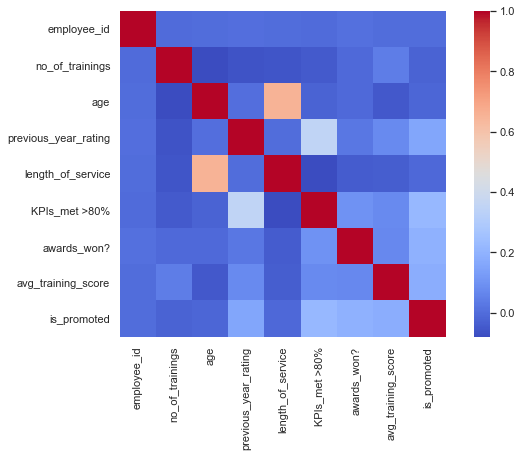

In [119]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')
pass

Ожидаемо присутствует корреляция между стажем работы и возрастом 

### Связь разных характеристик и повышения в должности


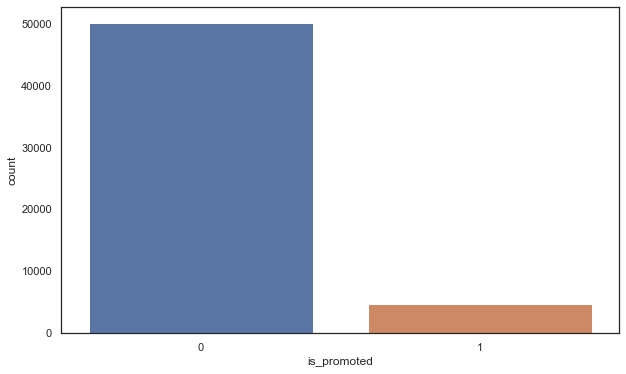

In [177]:
sns.countplot(x='is_promoted', data = data)
pass

In [181]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [182]:
4668 / 54808

0.08517004816815063

Только 8.52 % сотрудников из всей выборки получили повышение в компании.

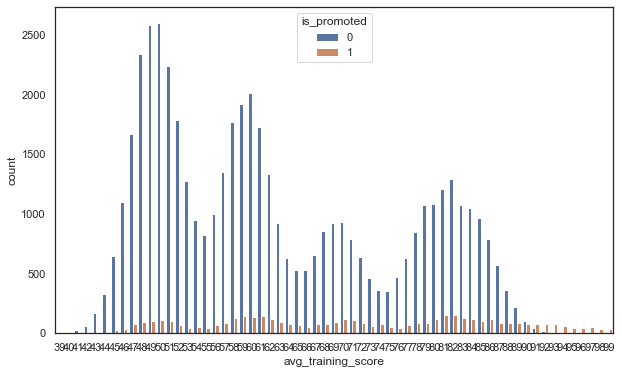

In [184]:
sns.countplot(x='avg_training_score', hue ='is_promoted',  data=data)
pass

#### There are two different ways to do the same things

In [ ]:
data.groupby('department')['employee_id'].count()

In [ ]:
data['department'].value_counts()

## Заполняем пропущенные значения

In [185]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [186]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)

In [187]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [188]:
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)

In [189]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Обработка категориальных признаков

In [191]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


## gender

In [195]:
data['gender'] = pd.factorize(data['gender'])[0]

## department

In [196]:
dummies = pd.get_dummies(data['department'])

In [197]:
dummies.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [198]:
data = pd.concat((data, Building_dummies), axis=1)
data = data.drop(['department'], axis=1)

## region